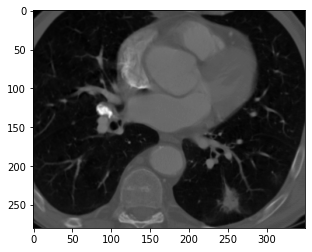

(280, 350)


In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.special import digamma
%matplotlib inline
from ct_charachterization.utility.utils import central_gamma_pdf
from glob import glob
import pydicom as dicom
import dicom_numpy
import numpy as np
import SimpleITK as sitk
from matplotlib import pyplot as plt
from scipy.stats import mode
mu_5 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340])
img = np.load(f'''../resources/luna_cropped.npy''')
plt.imshow(img, cmap='gray')
plt.show()
print(img.shape)

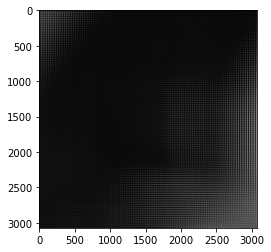

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm.py:10: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (np.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


iteration: 1, error: 0.1222940508373219
iteration: 2, error: 0.0


/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  theta_before_expansion = np.array([initial_pi, initial_alpha, initial_beta])


iteration: 1, error: 0.26056151999985916
iteration: 2, error: 0.004762949050374908
iteration: 3, error: 0.22150351227457615
iteration: 4, error: 0.004216536692167803
iteration: 5, error: 0.18215492921491022
newww
stable
smalled
(96, 96)


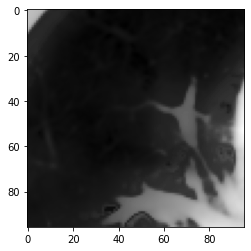

-949.3640220345352 -753.1273376894623 248.08081026167997


In [2]:
from ct_charachterization.utility.utils import broadcast_tile, block_matrix, \
    sum_over_each_neighborhood_on_blocked_matrix, expand, contract, central_gamma_pdf
from ct_charachterization import run_third_algorithm


y = img[0:128,0:128]
big_y = expand(small_img=y, neighborhood_size=32)
big_y = big_y[16 * 32:(128-16) * 32, 16 * 32:(128-16) * 32]
plt.imshow(big_y, cmap='gray')
plt.show()
big_y_stab = run_third_algorithm(big_y, mu_5, non_central=True, constant_c=10, neighborhood_size=32, max_iter=5)
print('stable')
y_stab = contract(big_img=big_y_stab, neighborhood_size=32)
print('smalled')
sy = y_stab
print(sy.shape)
plt.imshow(sy, cmap='gray')
plt.show()
print(np.min(sy) - 1030, np.mean(sy) - 1030, np.max(sy) - 1030)



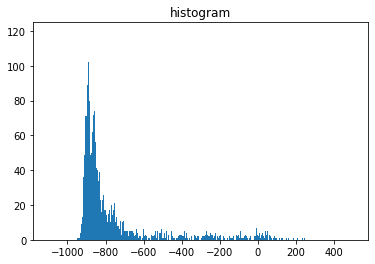

In [5]:
flat = sy.flatten() - 1030
ax = plt.subplot(1, 1, 1)
ax.hist(flat, bins=list(np.arange(-1100, 500, 1)))
plt.title("histogram")
plt.show()

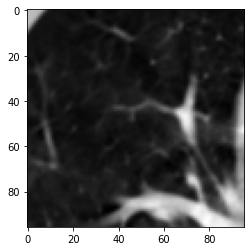

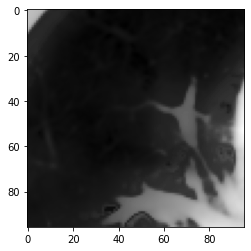

In [6]:
y = img[16:112,16:112]
plt.imshow(y, cmap='gray')
plt.show()
plt.imshow(sy, cmap='gray')
plt.show()